In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import qnmfits
import utils

from cmcrameri import cm

plt.rcParams.update(utils.rcparams)

In [4]:
N_min = 0
N_max = 20

N_list = list(range(N_min,N_max+1))

# Create a custom colormap
color_list = [cm.roma(N/N_max) for N in N_list]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    None, color_list, N=len(color_list)
    )

norm = mpl.colors.Normalize(vmin=N_min-0.5, vmax=N_max+0.5)

In [3]:
t0_E = pd.read_csv('../data/t0N_E.csv', index_col=0)

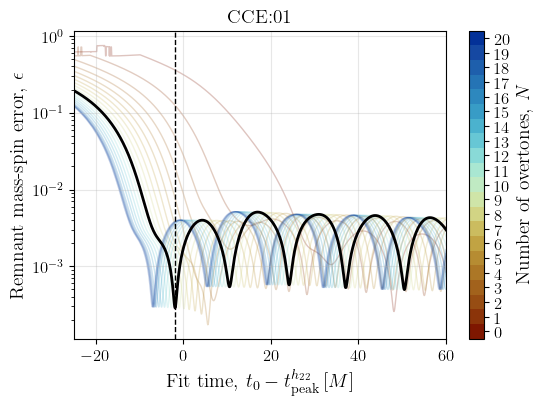

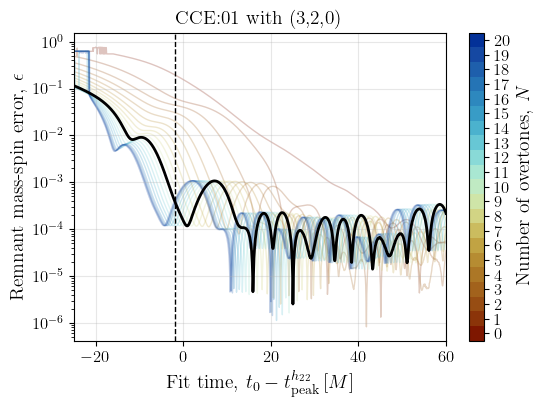

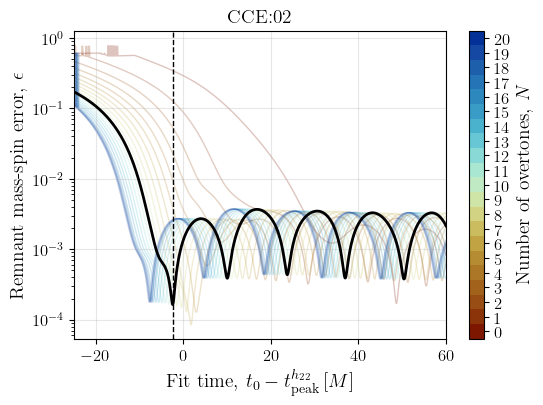

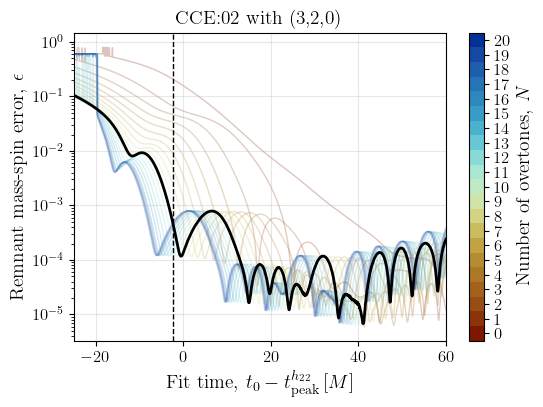

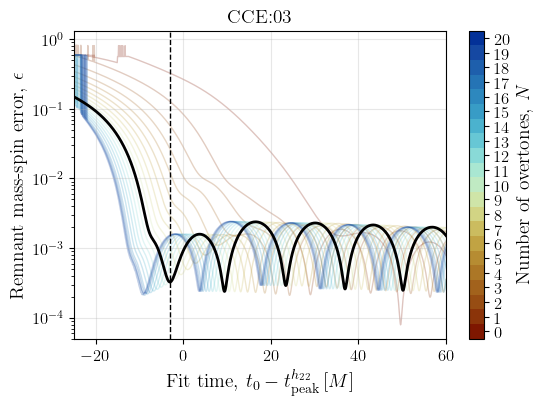

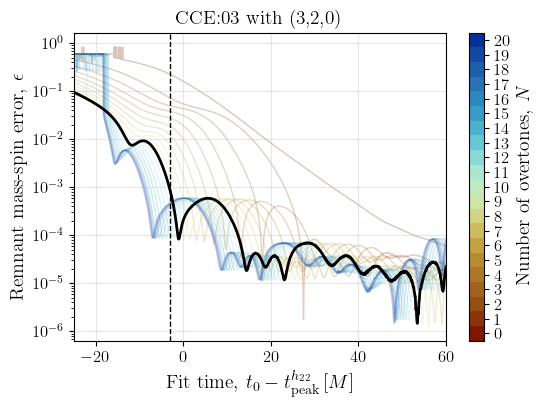

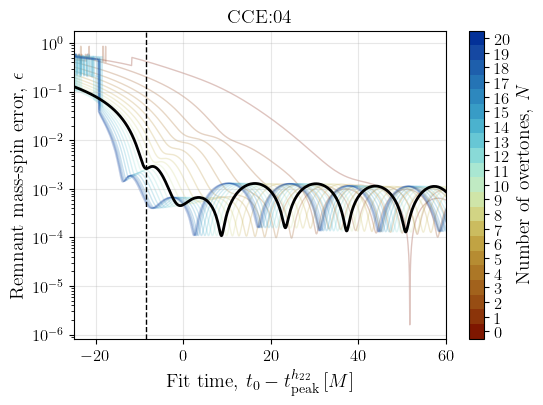

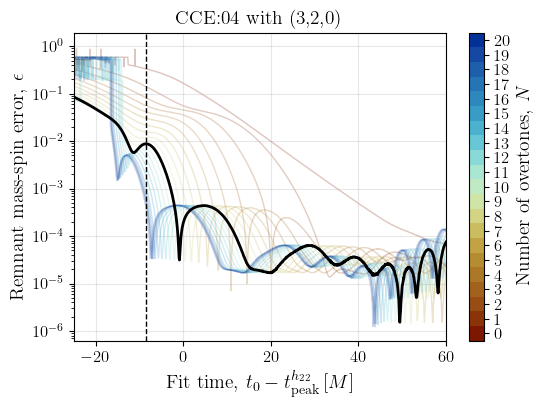

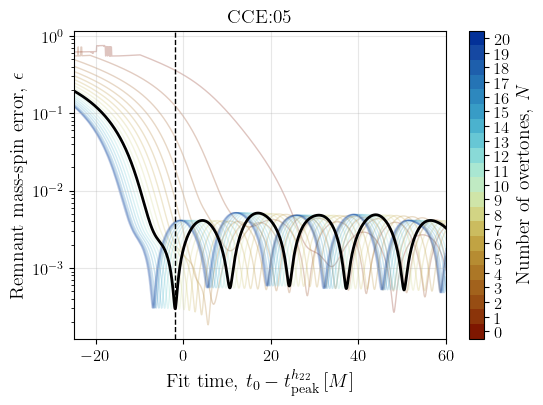

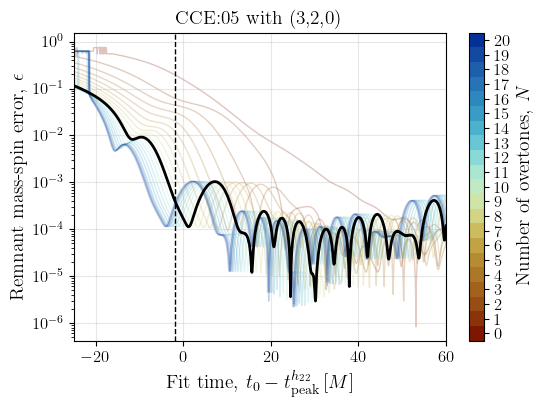

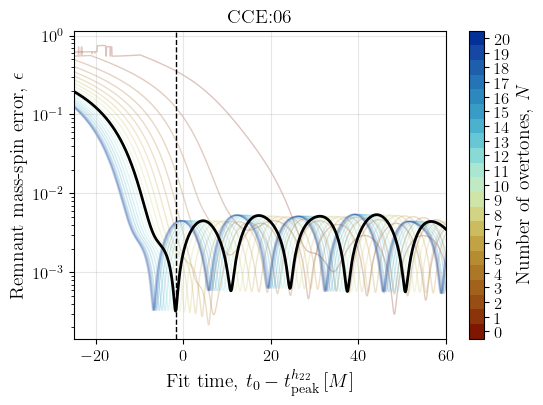

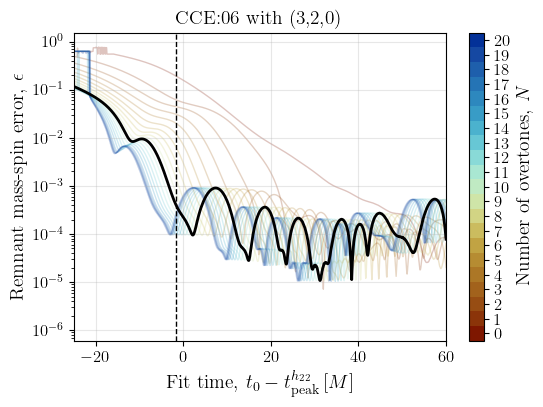

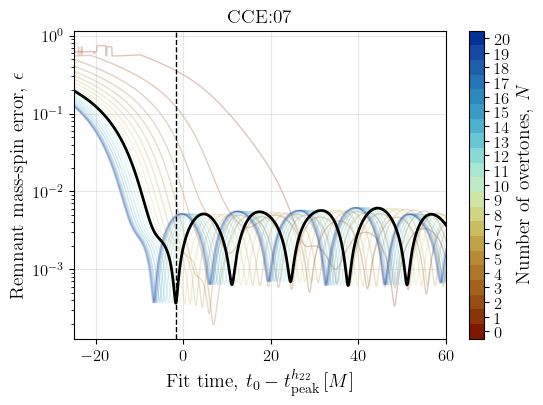

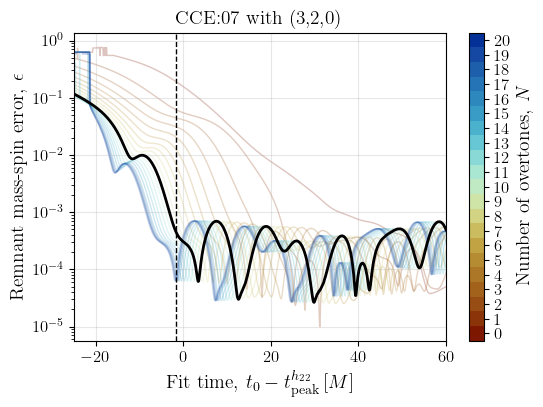

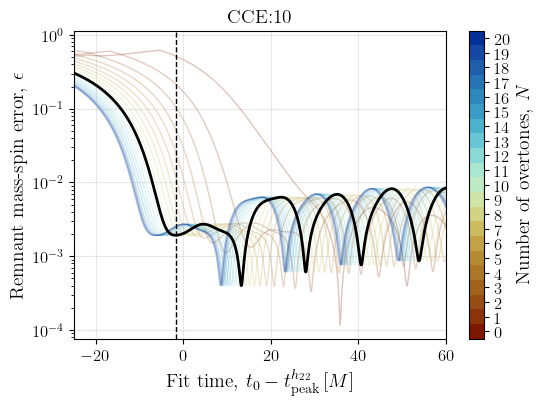

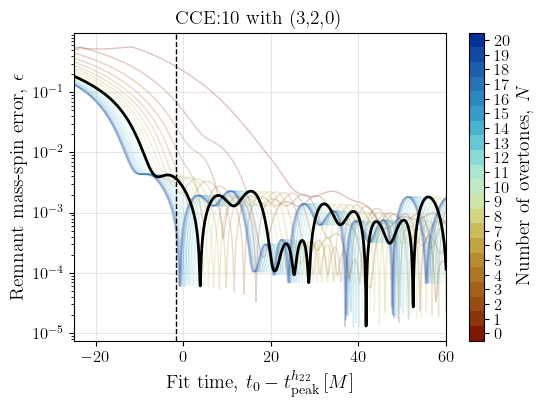

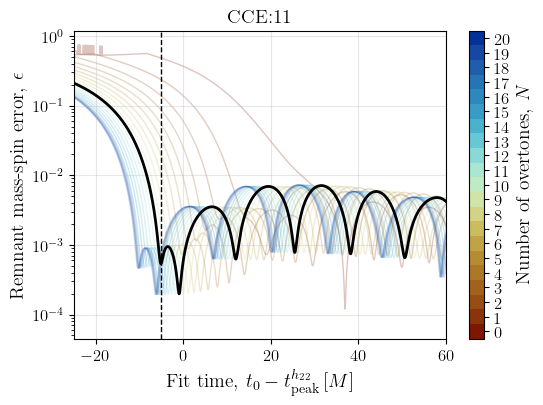

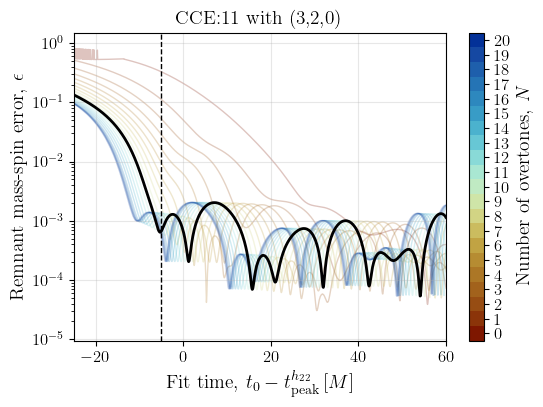

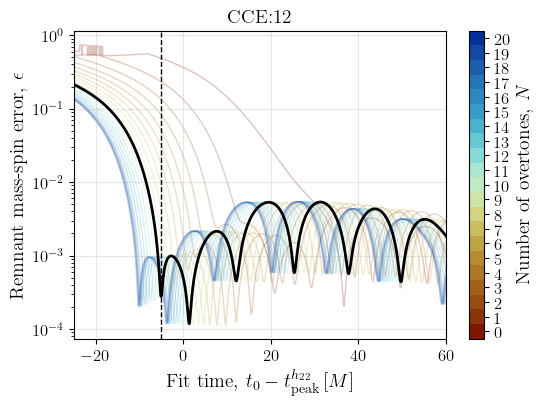

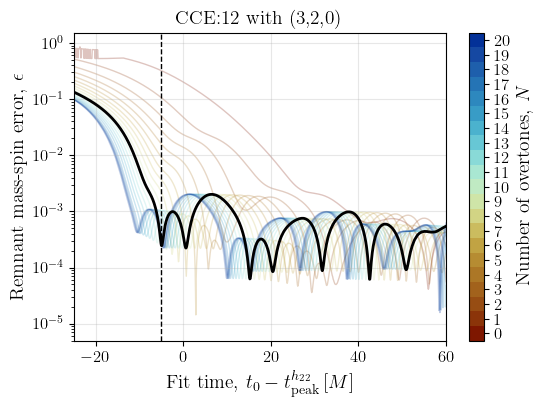

In [11]:
for ID in t0_E.columns:

    data = pd.read_csv(f'../data/epsilon_curves/{ID}.csv', index_col=0)
    data_with_320 = pd.read_csv(f'../data/epsilon_curves/{ID}_with320.csv', index_col=0)

    t0_array = data['t'].values

    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        ax=ax, 
        ticks=range(N_min, N_max+1),
        label=r'Number of overtones, $N$'
        )

    for n in N_list:

        if n == 10:
            zorder = 2
            alpha = 1
            lw = 2
            c = 'k'
        else:
            zorder = 1
            alpha = 0.25
            lw = 1
            c = cmap(n/N_max)
        
        ax.plot(
            t0_array,
            data[str(n)],
            color=c,
            zorder=zorder,
            alpha=alpha,
            lw=lw
            )
        
    ax.axvline(t0_E[ID].values[10], color='k', ls='--', lw=1)
        
    ax.set_xlim(-25, 60)

    ax.set_xlabel(r'Fit time, $t_0 - t_\mathrm{peak}^{h_{22}}\,[M]$')
    ax.set_ylabel(r'Remnant mass-spin error, $\epsilon$')

    ax.set_title(f'CCE:{int(ID):02}')

    # ---

    t0_array = data_with_320['t'].values

    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        ax=ax, 
        ticks=range(N_min, N_max+1),
        label=r'Number of overtones, $N$'
        )

    for n in N_list:

        if n == 10:
            zorder = 2
            alpha = 1
            lw = 2
            c = 'k'
        else:
            zorder = 1
            alpha = 0.25
            lw = 1
            c = cmap(n/N_max)
        
        ax.plot(
            t0_array,
            data_with_320[str(n)],
            color=c,
            zorder=zorder,
            alpha=alpha,
            lw=lw
            )
        
    ax.axvline(t0_E[ID].values[10], color='k', ls='--', lw=1)
        
    ax.set_xlim(-25, 60)

    ax.set_xlabel(r'Fit time, $t_0 - t_\mathrm{peak}^{h_{22}}\,[M]$')
    ax.set_ylabel(r'Remnant mass-spin error, $\epsilon$')

    ax.set_title(f'CCE:{int(ID):02} with (3,2,0)')

    # fig.savefig('figures/presentation/epsilon_curves.png', dpi=300, bbox_inches='tight')

In [ ]:
data = pd.read_csv('../data/epsilon_curves/4_with320.csv', index_col=0)

In [ ]:
t0_array = data['t'].values

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_yscale('log')
ax.grid(alpha=0.3)

norm = mpl.colors.Normalize(vmin=N_min-0.5, vmax=N_max+0.5)

fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax, 
    ticks=range(N_min, N_max+1),
    label=r'Number of overtones, $N$'
    )

for n in N_list:
    
    ax.plot(
        t0_array,
        data[str(n)],
        color=cmap(n/N_max),
        zorder=1,
        alpha=0.5,
        lw=1
        )
    
ax.set_xlim(-25, 60)

ax.set_xlabel(r'Fit time, $t_0 - t_\mathrm{peak}^{h_{22}}\,[M]$')
ax.set_ylabel(r'Mismatch, $\mathcal{M}$');

# fig.savefig('figures/presentation/epsilon_curves.png', dpi=300, bbox_inches='tight')

In [ ]:
sim_info = utils.load_cce_data(1)
sim = sim_info['sim']
chif = sim.chif_mag
Mf = sim.Mf

In [ ]:
epsilon_dict = {}

for N in [0, 1]:

    epsilon_dict[N] = []
    modes = [(2, 2, n, 1) for n in range(N + 1)]
    
    for t0 in t0_array:

        if t0 < 0:
            x0 = [1.5, chif]
        else:
            x0 = [Mf, chif]
        
        epsilon = qnmfits.calculate_epsilon(
            sim.times, 
            data=sim.h[2,2], 
            modes=modes,
            Mf=Mf,
            chif=chif,
            t0=t0,
            t0_method='closest',
            T=100,
            x0=x0
        )
        
        epsilon_dict[N].append(epsilon[0])


In [ ]:
t0_E = pd.read_csv('../data/t0N_E.csv', index_col=0)

In [ ]:
for N, t0 in enumerate(t0_E['1']):
    print(f'N={N}, t0={t0}')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.set_yscale('log')
ax.grid(alpha=0.3)

norm = mpl.colors.Normalize(vmin=N_min-0.5, vmax=N_max+0.5)

fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax, 
    ticks=range(N_min, N_max+1),
    label=r'Number of overtones, $N$'
    )

for n in N_list:

    t0E = t0_E['1'].values[n]

    if n in epsilon_dict:
        epsilon_list = epsilon_dict[n]
    else:
        epsilon_list = data[str(n)]

    t0E_epsilon = epsilon_list[np.argmin(np.abs(t0_array - t0E))]
    
    ax.plot(
        t0_array,
        epsilon_list,
        color=cmap(n/N_max),
        zorder=1,
        alpha=0.5,
        lw=1
        )
    
    ax.plot(
        t0E,
        t0E_epsilon,
        color=cmap(n/N_max),
        marker='x',
        markersize=6,
        zorder=2
    )
    
ax.set_xlim(-25, 60)

ax.set_xlabel(r'Fit time, $t_0 - t_\mathrm{peak}^{h_{22}}\,[M]$')
ax.set_ylabel(r'Remnant mass-spin error, $\epsilon$');

fig.savefig('figures/presentation/epsilon_curves.png', dpi=300, bbox_inches='tight')